In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv(r"C:\Users\ajarun\Documents\simplilearn\Capstone project\Ecommerce\train_data.csv")

In [3]:
data.head(5)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


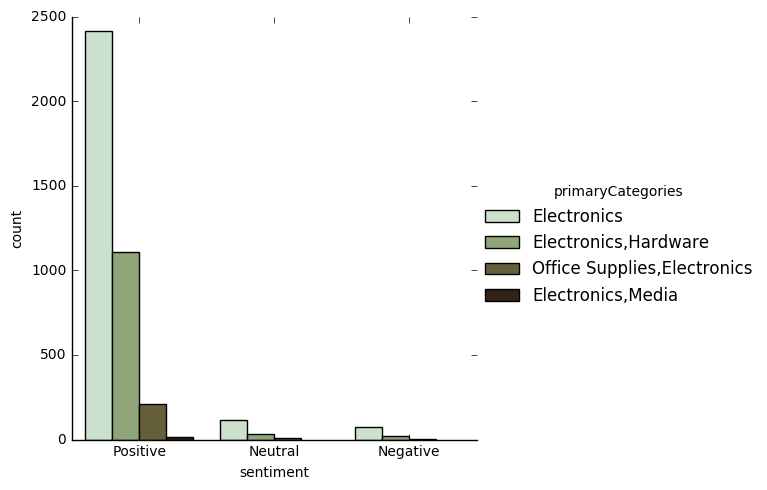

In [4]:
sns.catplot(x = 'sentiment', kind = 'count', palette = 'ch:0.95', data = data, hue = 'primaryCategories')

In [5]:
data['primaryCategories'].value_counts()

Electronics                    2600
Electronics,Hardware           1159
Office Supplies,Electronics     224
Electronics,Media                17
Name: primaryCategories, dtype: int64

In [6]:
data['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

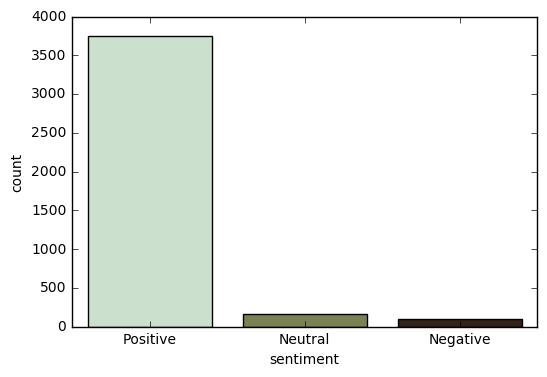

In [7]:
sns.countplot(data = data, x = 'sentiment', palette = 'ch:0.95')

In [8]:
import nltk

In [9]:
data.shape[0]

4000

In [10]:
def tokenize_data(dataset):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    for i in range(dataset.shape[0]):
       dataset["reviews.text"][i] = tokenizer.tokenize(dataset["reviews.text"][i])
    return dataset

In [11]:
newdata=tokenize_data(data)

In [12]:
def remove_stop_words(dataset):
    stop_words = set(stopwords.words('english'))
    for i in range(dataset.shape[0]):
        dataset["reviews"][i] = ([token.lower() for token in dataset["reviews"][i] if token not in stop_words])
    
    return dataset

In [13]:
def normalize(dataset):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    for i in range(dataset.shape[0]):
        dataset.reviews[i] = " ".join([lemmatizer.lemmatize(token) for token in dataset.reviews[i]]).strip()
    return dataset

In [14]:
import string
def punct(dataset):
    table = str.maketrans('', '', string.punctuation)
    for i in range(dataset.shape[0]):
        dataset.reviews[i] = [w.translate(table) for w in dataset.reviews[i]]
    return dataset

In [15]:
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer()
corpus = [] 
  
for i in range(0, len(data)): 
    text = re.sub('[^a-zA-Z]', '', str(data['reviews.text'][i])) 
    text = text.lower() 
    text = text.split() 
    ps = PorterStemmer() 
    text = ''.join(text) 
    corpus.append(text) 
  
# creating bag of words model 
X = vectorizer.fit_transform(corpus).toarray()
print(X.shape)
y = data['sentiment'].values 

(4000, 3594)


In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 


In [18]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
  
classifier = GaussianNB(); 
classifier.fit(X_train, y_train) 
  
# predicting test set results 
y_pred = classifier.predict(X_test) 
print(classification_report(y_test, y_pred)) 
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 

              precision    recall  f1-score   support

    Negative       0.02      1.00      0.03        15
     Neutral       1.00      0.07      0.13        44
    Positive       1.00      0.14      0.25       941

    accuracy                           0.15      1000
   macro avg       0.67      0.40      0.14      1000
weighted avg       0.99      0.15      0.24      1000



array([[ 15,   0,   0],
       [ 41,   3,   0],
       [809,   0, 132]], dtype=int64)

In [19]:
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred,pos_label=3)
#pip install --user imbalanced_learn
#conda install -c conda-forge imbalanced-learn

In [20]:
import imblearn

In [21]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 3)

In [22]:
y_train

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [23]:
X_train_over, y_train_over = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {}'.format(y_train.shape)) 
print("After OverSampling, counts of label 'Positive': {}".format(sum(y_train == 'Positive'))) 
print("After OverSampling, counts of label 'Neutral': {}".format(sum(y_train == 'Neutral'))) 
print("After OverSampling, counts of label 'Negative': {} \n".format(sum(y_train == 'Negative')))
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_over.shape)) 
print("After OverSampling, counts of label 'Positive': {}".format(sum(y_train_over == 'Positive'))) 
print("After OverSampling, counts of label 'Neutral': {}".format(sum(y_train_over == 'Neutral'))) 
print("After OverSampling, counts of label 'Negative': {}".format(sum(y_train_over == 'Negative')))

After OverSampling, the shape of train_X: (3000, 3594)
After OverSampling, the shape of train_y: (3000,)
After OverSampling, counts of label 'Positive': 2808
After OverSampling, counts of label 'Neutral': 114
After OverSampling, counts of label 'Negative': 78 

After OverSampling, the shape of train_X: (8424, 3594)
After OverSampling, the shape of train_y: (8424,)
After OverSampling, counts of label 'Positive': 2808
After OverSampling, counts of label 'Neutral': 2808
After OverSampling, counts of label 'Negative': 2808


In [24]:
classifier.fit(X_train_over, y_train_over.ravel()) 
  
# predicting test set results 
y_pred = classifier.predict(X_test) 
# making the confusion matrix 
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
cm 

              precision    recall  f1-score   support

    Negative       0.02      1.00      0.03        15
     Neutral       1.00      0.07      0.13        44
    Positive       1.00      0.14      0.25       941

    accuracy                           0.15      1000
   macro avg       0.67      0.40      0.14      1000
weighted avg       0.99      0.15      0.24      1000



array([[ 15,   0,   0],
       [ 41,   3,   0],
       [809,   0, 132]], dtype=int64)

In [25]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After underSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After underSampling, the shape of train_y: {}'.format(y_train.shape)) 
print("After underSampling, counts of label 'Positive': {}".format(sum(y_train == 'Positive'))) 
print("After underSampling, counts of label 'Neutral': {}".format(sum(y_train == 'Neutral'))) 
print("After underSampling, counts of label 'Negative': {} \n".format(sum(y_train == 'Negative')))
  
print('After underSampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After underSampling, the shape of train_y: {}'.format(y_train_miss.shape)) 
print("After underSampling, counts of label 'Positive': {}".format(sum(y_train_miss == 'Positive'))) 
print("After underSampling, counts of label 'Neutral': {}".format(sum(y_train_miss == 'Neutral'))) 
print("After underSampling, counts of label 'Negative': {}".format(sum(y_train_miss == 'Negative')))


After underSampling, the shape of train_X: (3000, 3594)
After underSampling, the shape of train_y: (3000,)
After underSampling, counts of label 'Positive': 2808
After underSampling, counts of label 'Neutral': 114
After underSampling, counts of label 'Negative': 78 

After underSampling, the shape of train_X: (234, 3594)
After underSampling, the shape of train_y: (234,)
After underSampling, counts of label 'Positive': 78
After underSampling, counts of label 'Neutral': 78
After underSampling, counts of label 'Negative': 78


In [26]:
classifier.fit(X_train_miss, y_train_miss.ravel()) 
  
# predicting test set results 
y_pred = classifier.predict(X_test) 
# making the confusion matrix 
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
cm 

              precision    recall  f1-score   support

    Negative       0.02      1.00      0.03        15
     Neutral       1.00      0.05      0.09        44
    Positive       1.00      0.00      0.00       941

    accuracy                           0.02      1000
   macro avg       0.67      0.35      0.04      1000
weighted avg       0.99      0.02      0.01      1000



array([[ 15,   0,   0],
       [ 42,   2,   0],
       [939,   0,   2]], dtype=int64)

In [27]:
#AUC-ROC curve is used to binary classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

# Train model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# predicting test set results 
y_pred = clf.predict(X_test) 
# making the confusion matrix 
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
cm 

              precision    recall  f1-score   support

    Negative       1.00      0.13      0.24        15
     Neutral       1.00      0.07      0.13        44
    Positive       0.95      1.00      0.97       941

    accuracy                           0.95      1000
   macro avg       0.98      0.40      0.45      1000
weighted avg       0.95      0.95      0.92      1000



array([[  2,   0,  13],
       [  0,   3,  41],
       [  0,   0, 941]], dtype=int64)

In [31]:
'''max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 
4-6 can be good starting points.
min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and 
leaf nodes can have smaller size groups.
gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
scale_pos_weight = 1: Because of high class imbalance.num_classes=3
objective=multi:softmax in your code.It is more apt for multi-class classification task'''

from xgboost import XGBClassifier 
clfxg = XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=1000,min_child_weight = 1,scale_pos_weight = 1,
                        num_classes=3)

In [32]:
clfxg.fit(X_train, y_train)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, num_classes=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [33]:
y_pred = clfxg.predict(X_test)
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
cm 

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.00      0.00      0.00        44
    Positive       0.94      1.00      0.97       941

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.89      0.94      0.91      1000



C:\Users\ajarun\AppData\Roaming\Python\Python35\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,  15],
       [  0,   0,  44],
       [  0,   0, 941]], dtype=int64)

In [34]:
from sklearn.svm import SVC
params_grid = [{'kernel': ['rbf'], 'gamma': [.01,.001,.0001],'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)


In [35]:
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)

Best score for training data: 0.9476666666666667 

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.01 



NameError: name 'encoder' is not defined

In [37]:
print(classification_report(y_test, y_pred)) 
# making the confusion matrix 
svccm = confusion_matrix(y_test, y_pred) 
svccm 

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.00      0.00      0.00        44
    Positive       0.94      1.00      0.97       941

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.89      0.94      0.91      1000



C:\Users\ajarun\AppData\Roaming\Python\Python35\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,  15],
       [  0,   0,  44],
       [  0,   0, 941]], dtype=int64)

In [ ]:
#Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB ALREADY DONE ABOVE